Exploratory Analysis on Chicago Crime data (2001 - 2022)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('c:/datasets/crime_data_Proj1.csv')
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [ ]:
#To Check dataframe structure and properties

Columns & their descriptions included in my main data frame:

Number: Row number used as an index

ID: Unique numeric ID

Case Number: Unique numeric/letter based ID

Date: Datestamp in MM/DD/YYYY, HH:MM:SS day and time format

Block: Block of crime with street number and street, only showing first 3 digits of street number for privacy. ex) 013XX S Sawyer Ave

IUCR: 4 digit crime reference number, non-unique

Primary_Type: Short crime description/categorization

Description: Longer explanation of crime (1–5 words typically)

Location_Description: Short location description/categorization

Arrest: True or False

Domestic: True or False

X Coordinate: X coordinate of the location

Y Coordinate: Y coordinate of the location

Latitude: Latitude of location

Longitude: Longitude of Location

Year: Year crime occurred

In [ ]:
df.shape

(2278726, 23)

We can see that the dataset has 2278726, observations and 23 features.



In [ ]:
# Data types of the various columns
df.dtypes

Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

We observe that our dataset has a combination of categorical (object) and numeric (float and int) features. At this point, I went back to the data dictionary for an understanding of the columns and their meanings.

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2278726.0,1.139362e+06,6.578117e+05,0.000000,5.696812e+05,1.139362e+06,1.709044e+06,2.278725e+06
ID,2278726.0,6.882068e+06,3.419168e+06,637.000000,3.716076e+06,6.885990e+06,9.887568e+06,1.278199e+07
Beat,2278726.0,1.186442e+03,7.026836e+02,111.000000,6.210000e+02,1.034000e+03,1.731000e+03,2.535000e+03
District,2278714.0,1.129072e+01,6.946692e+00,1.000000,6.000000e+00,1.000000e+01,1.700000e+01,3.100000e+01
Ward,2094031.0,2.272764e+01,1.383464e+01,1.000000,1.000000e+01,2.300000e+01,3.400000e+01,5.000000e+01
Community Area,2094459.0,3.752140e+01,2.153282e+01,0.000000,2.300000e+01,3.200000e+01,5.700000e+01,7.700000e+01
X Coordinate,2254741.0,1.164569e+06,1.673955e+04,0.000000,1.152948e+06,1.166060e+06,1.176365e+06,1.205119e+06
Y Coordinate,2254741.0,1.885747e+06,3.209855e+04,0.000000,1.859053e+06,1.890673e+06,1.909219e+06,1.951622e+06
Year,2278726.0,2.009638e+03,6.019724e+00,2001.000000,2.004000e+03,2.009000e+03,2.014000e+03,2.022000e+03
Latitude,2254741.0,4.184209e+01,8.830434e-02,36.619446,4.176866e+01,4.185578e+01,4.190668e+01,4.202291e+01


We can see for each numeric feature, the count of values in it, the mean value, std or standard deviation, minimum value, the 25th percentile, the 50th percentile or median, the 75th percentile, and the maximum value. From the count we can also identify the features with missing values; their count is not equal to the total number of rows of the dataset.

In [ ]:
#To check the summary statistics of only the categorical features, we will use
df.describe(include=object)

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,FBI Code,Updated On,Location
count,2278725,2278726,2278726,2278726,2278726,2278726,2275849,2278726,2278726,2254741
unique,2278678,1343546,54347,392,35,515,198,26,4461,545376
top,HK172551,01/01/2008 12:01:00 AM,100XX W OHARE ST,0820,THEFT,SIMPLE,STREET,06,02/10/2018 03:50:01 PM,"(41.976290414, -87.905227221)"
freq,3,81,4878,184891,479375,268418,590957,479375,836558,4227


This table is a bit different from the one for numeric features. Here, we get the count of the values of each feature, the number of unique classes, the top most frequent class, and how frequently that class occurs in the data set.

We note that some classes have a lot of unique values such as Case Number, followed by Date and Location. Also from this finding, THEFT is the top most Primary Type of crime, followed by SIMPLE as being the Description and th top most Location Description happened to be STREET.

DATA CLEANING

Introduction
Data Cleaning is the process of finding and correcting the inaccurate/incorrect data that are present in the dataset. One such process needed is to do something about the values that are missing in the dataset. In real life, many datasets will have many missing values, so dealing with them is an important step.

In [ ]:
print(df.isnull().sum())

Unnamed: 0                   0
ID                           0
Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64


In [ ]:
# df.apply(lambda col:pd.to_numeric(col, errors='coerce'))
for i in range(0, len(df.columns)):
    df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], errors='ignore')
    # errors='ignore' lets strings remain as 'non-null objects'

In [ ]:
types = df.dtypes
print(types)

Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object


In [ ]:
print(df.isnull().sum())

Unnamed: 0                   0
ID                           0
Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64


In [ ]:
# Deal with Missing Values
#First: Drop rows for categorical variables

categorical variables with missing values are:  Case Number, Location Description, and Location

In [ ]:
df = df.dropna(subset=['Case Number'])
df = df.dropna(subset=['Location Description'])
df = df.dropna(subset=['Location'])

In [ ]:
print(df.isna().sum())

Unnamed: 0                   0
ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description         0
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    181938
Community Area          181545
FBI Code                     0
X Coordinate                 0
Y Coordinate                 0
Year                         0
Updated On                   0
Latitude                     0
Longitude                    0
Location                     0
dtype: int64


In [ ]:
df

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278721,2278721,10716043,HZ474139,10/14/2016 02:35:00 PM,006XX N CLARK ST,0560,ASSAULT,SIMPLE,CONVENIENCE STORE,True,...,42.0,8.0,08A,1175423.0,1904617.0,2016,02/10/2018 03:50:01 PM,41.893647,-87.631177,"(41.893646656, -87.631177143)"
2278722,2278722,1740109,G546340,09/11/2001 10:20:00 PM,052XX W LAKE ST,0460,BATTERY,SIMPLE,RESIDENCE,False,...,NaN,NaN,08B,1141137.0,1902008.0,2001,08/17/2015 03:03:40 PM,41.887188,-87.757163,"(41.887188151, -87.757163155)"
2278723,2278723,4737434,HM342705,05/10/2006 07:49:00 PM,007XX E OAKWOOD BLVD,0560,ASSAULT,SIMPLE,APARTMENT,False,...,4.0,38.0,08A,1181989.0,1878827.0,2006,02/28/2018 03:56:25 PM,41.822727,-87.607863,"(41.82272748, -87.607863136)"
2278724,2278724,11122832,JA476827,10/18/2017 10:30:00 PM,002XX W ERIE ST,1360,CRIMINAL TRESPASS,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,...,42.0,8.0,26,1174469.0,1904732.0,2017,02/10/2018 03:50:01 PM,41.893984,-87.634677,"(41.893983593, -87.634677382)"


From the above missing data treatment using dropna function the following Features such as :X Coordinate, Y Coordinate, Latitude, Longitude have no bearing to crime prediction as they perform the same function as Location. I am dropping them.

In [ ]:
df = df.drop(['ID', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Updated On','Latitude', 'Longitude'], axis = 1)

In [ ]:
df.head()

,Unnamed: 0,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Location
0,0,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,46.0,14,2008,"(41.739979622, -87.555120042)"
1,1,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,15,2018,"(41.726922145, -87.599746995)"
2,2,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,12.0,05,2007,"(41.994137622, -87.734959049)"
3,3,07/23/2018 08:55:00 AM,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,26.0,08A,2018,"(41.881217483, -87.730589961)"
4,4,07/11/2021 06:40:00 AM,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,28.0,04A,2021,"(41.874173691, -87.668082118)"


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2252872.0,1.139370e+06,657802.123277,0.0,569725.75,1139343.5,1708985.25,2278725.0
Beat,2252872.0,1.186054e+03,702.583919,111.0,621.00,1034.0,1731.00,2535.0
District,2252860.0,1.128717e+01,6.945358,1.0,6.00,10.0,17.00,31.0
Ward,2070934.0,2.271302e+01,13.829003,1.0,10.00,22.0,34.00,50.0
Community Area,2071327.0,3.754641e+01,21.529496,0.0,23.00,32.0,57.00,77.0
Year,2252872.0,2.009626e+03,6.007905,2001.0,2004.00,2009.0,2014.00,2022.0


In [ ]:
df.describe(include=object)

,Date,Block,Primary Type,Description,Location Description,FBI Code,Location
count,2252872,2252872,2252872,2252872,2252872,2252872,2252872
unique,1334507,53378,35,513,198,26,545167
top,01/01/2007 12:01:00 AM,100XX W OHARE ST,THEFT,SIMPLE,STREET,06,"(41.976290414, -87.905227221)"
freq,53,4785,473224,267016,586599,473224,4227


In [ ]:
df.describe(include=bool)

,Arrest,Domestic
count,2252872,2252872
unique,2,2
top,False,False
freq,1655000,1941710


We need to ennumerate the data for Arrest and Domestic numerically now. We will let 0 represent False and 1 represent True

In [ ]:
df['Arrest'] = df['Arrest'].map( {True: 1, False: 0} ).astype(int)
df['Domestic'] = df['Domestic'].map( {True: 1, False: 0} ).astype(int)

In [ ]:
df.head()

,Unnamed: 0,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Location
0,0,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,0,0,423,4.0,10.0,46.0,14,2008,"(41.739979622, -87.555120042)"
1,1,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,1,0,413,4.0,8.0,47.0,15,2018,"(41.726922145, -87.599746995)"
2,2,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,1,0,1711,17.0,39.0,12.0,05,2007,"(41.994137622, -87.734959049)"
3,3,07/23/2018 08:55:00 AM,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,0,0,1115,11.0,28.0,26.0,08A,2018,"(41.881217483, -87.730589961)"
4,4,07/11/2021 06:40:00 AM,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),0,0,1231,12.0,27.0,28.0,04A,2021,"(41.874173691, -87.668082118)"


Primary Type is the type of crime committed...let's see what different types of crimes are there:

In [ ]:
df['Primary Type'].unique()

array(['CRIMINAL DAMAGE', 'WEAPONS VIOLATION', 'BURGLARY', 'ASSAULT',
       'THEFT', 'ROBBERY', 'NARCOTICS', 'MOTOR VEHICLE THEFT', 'BATTERY',
       'OTHER OFFENSE', 'PROSTITUTION', 'DECEPTIVE PRACTICE',
       'INTIMIDATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'CRIMINAL TRESPASS', 'STALKING', 'OFFENSE INVOLVING CHILDREN',
       'PUBLIC PEACE VIOLATION', 'SEX OFFENSE', 'CRIM SEXUAL ASSAULT',
       'HOMICIDE', 'LIQUOR LAW VIOLATION', 'CRIMINAL SEXUAL ASSAULT',
       'KIDNAPPING', 'ARSON', 'GAMBLING',
       'CONCEALED CARRY LICENSE VIOLATION', 'PUBLIC INDECENCY',
       'RITUALISM', 'OBSCENITY', 'NON - CRIMINAL',
       'OTHER NARCOTIC VIOLATION', 'HUMAN TRAFFICKING', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

We also need to look at Location Description and ennumerate it:

In [ ]:
df['Location Description'].unique()

array(['STREET', 'POOL ROOM', 'RESIDENCE', 'NURSING HOME/RETIREMENT HOME',
       'PARKING LOT / GARAGE (NON RESIDENTIAL)', 'CTA PLATFORM', 'ALLEY',
       'POLICE FACILITY/VEH PARKING LOT', 'SIDEWALK', 'APARTMENT',
       'OTHER', 'SPORTS ARENA/STADIUM', 'CHA APARTMENT',
       'VEHICLE-COMMERCIAL', 'PARK PROPERTY',
       'GOVERNMENT BUILDING/PROPERTY', 'BAR OR TAVERN',
       'COMMERCIAL / BUSINESS OFFICE', 'CHA PARKING LOT/GROUNDS',
       'SMALL RETAIL STORE', 'RESIDENCE PORCH/HALLWAY', 'VACANT LOT/LAND',
       'VEHICLE NON-COMMERCIAL', 'DEPARTMENT STORE',
       'PARKING LOT/GARAGE(NON.RESID.)', 'CTA TRAIN', 'RESIDENCE-GARAGE',
       'DRUG STORE', 'HOSPITAL BUILDING/GROUNDS',
       'RESIDENTIAL YARD (FRONT/BACK)', 'CTA BUS',
       'SCHOOL, PUBLIC, BUILDING', 'RESTAURANT', 'GAS STATION',
       'NEWSSTAND', 'RESIDENCE - YARD (FRONT / BACK)',
       'TAVERN/LIQUOR STORE', 'RESIDENCE - PORCH / HALLWAY',
       'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'GROCERY FOOD STORE',
       'CA

Finding where most crimes occur

We then looked at where most of these crimes usually occur as this could be helpful in determining where to station the police force. For this I used the following code:

<AxesSubplot:xlabel='count', ylabel='Location Description'>

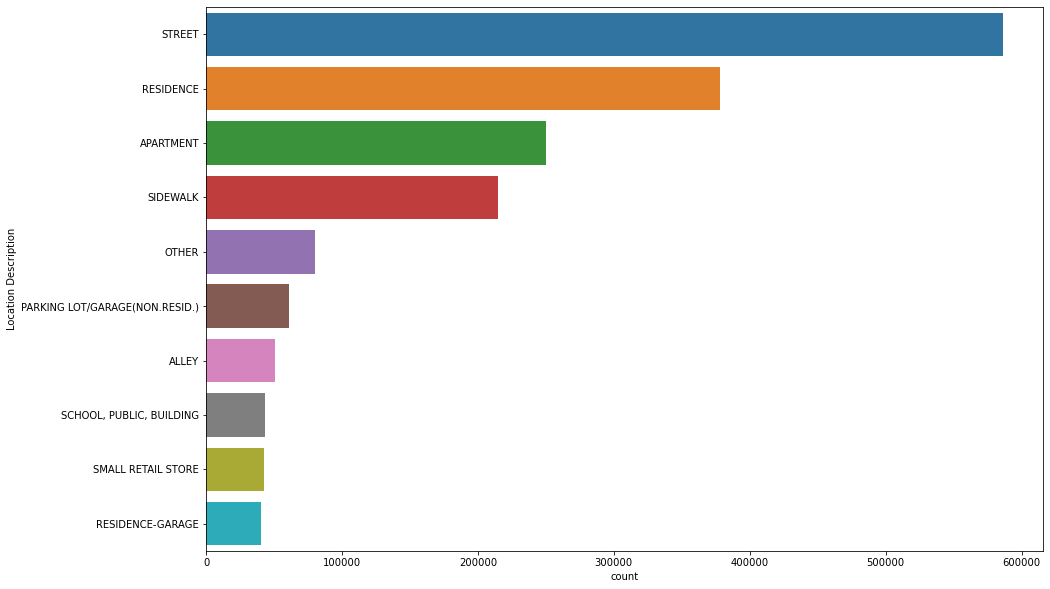

In [ ]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = df, order = df['Location Description'].value_counts().iloc[:10].index)

The above graph gave us important insights showing that most of the crimes occur in streets, residence of people or apartment. Highest rate of crime is done on street,residence,apartment and sidewalk.

In [ ]:
df.groupby([df['Location Description']]).size().sort_values(ascending=False)

Location Description
STREET                586599
RESIDENCE             378126
APARTMENT             250301
SIDEWALK              214966
OTHER                  79863
                       ...  
CHA PLAY LOT               1
CHA BREEZEWAY              1
BANQUET HALL               1
RIVER                      1
CTA SUBWAY STATION         1
Length: 198, dtype: int64

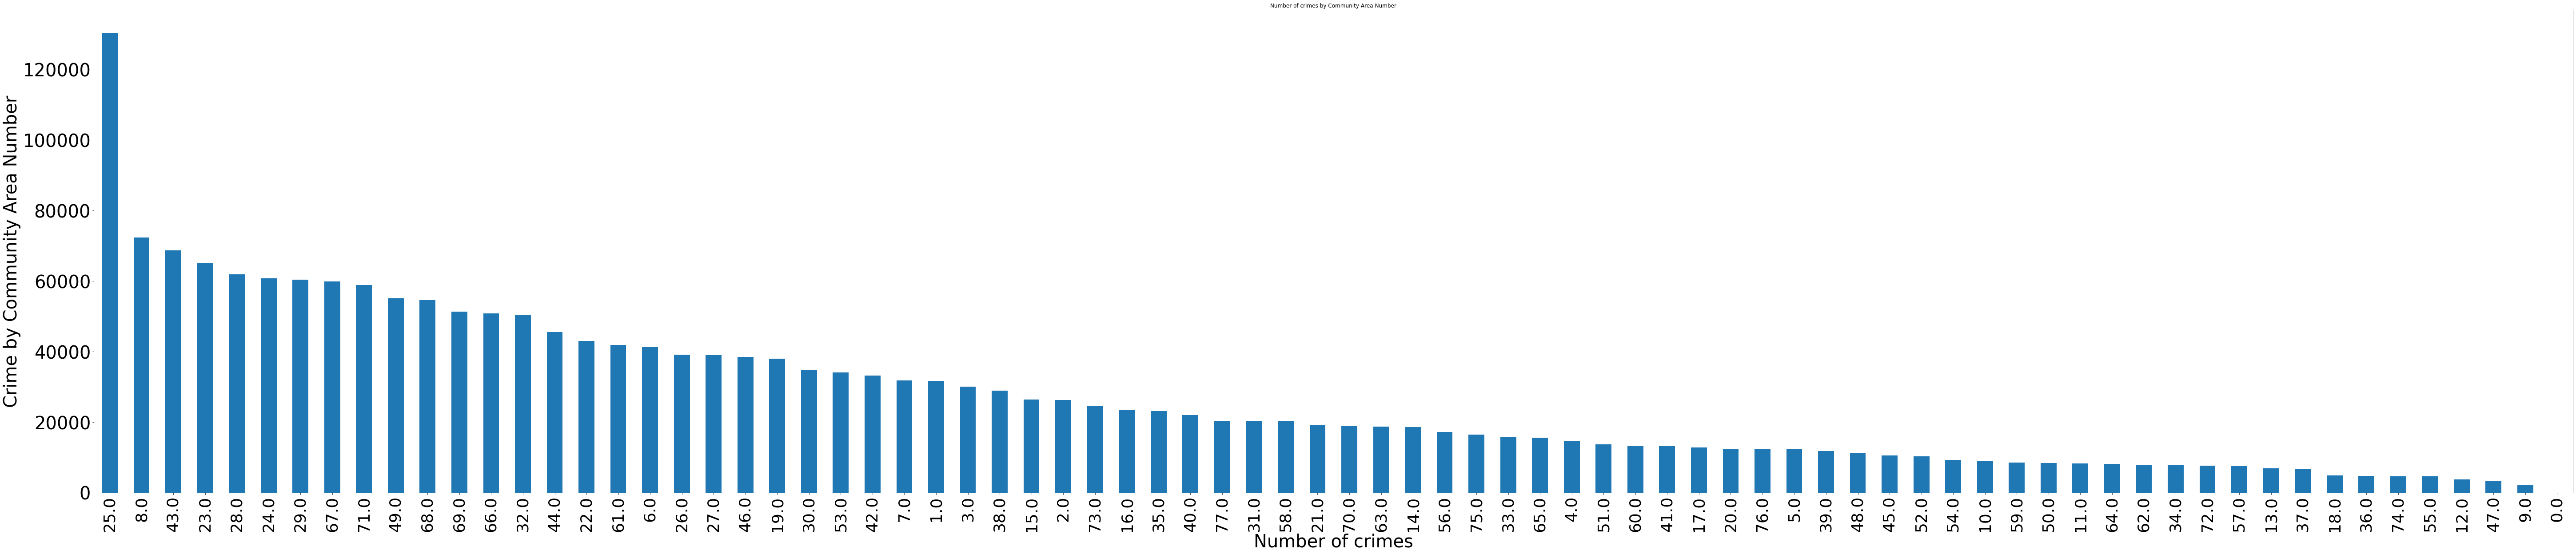

In [ ]:
#Number of crimes by Community Area Number
plt.figure(figsize=(100,20))
plt.rcParams['ytick.labelsize'] = 40
plt.rcParams['xtick.labelsize'] = 36
plt.ylabel('Frequency', fontsize=40)
plt.xlabel('Primary Type', fontsize=40)
df.groupby([df['Community Area']]).size().sort_values(ascending=False).plot(kind='bar', style='seaborn-paper')
plt.title('Number of crimes by Community Area Number')
plt.ylabel('Crime by Community Area Number')
plt.xlabel('Number of crimes')
plt.show()

<AxesSubplot:xlabel='count', ylabel='Primary Type'>

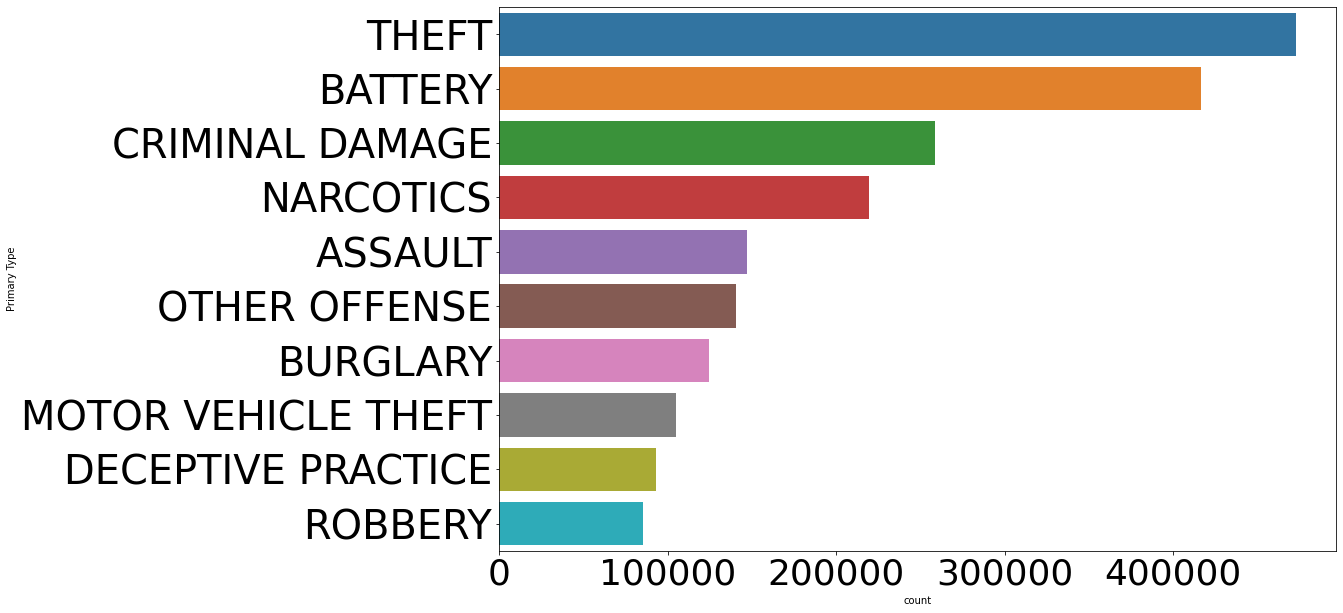

In [ ]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = df, order = df['Primary Type'].value_counts().iloc[:10].index)

The above plot display the most top ten crime Type and THEFT is leading followed by BATTERY, CRIMINAL DAMAGE, NACORTICS or ASSAULT.

In [ ]:
types = df.groupby([df['Primary Type']]).size().sort_values(ascending=False)
types

Primary Type
THEFT                                473224
BATTERY                              416910
CRIMINAL DAMAGE                      258651
NARCOTICS                            219441
ASSAULT                              147048
OTHER OFFENSE                        140514
BURGLARY                             124678
MOTOR VEHICLE THEFT                  104919
DECEPTIVE PRACTICE                    92874
ROBBERY                               85272
CRIMINAL TRESPASS                     63200
WEAPONS VIOLATION                     30071
PROSTITUTION                          20565
PUBLIC PEACE VIOLATION                15433
OFFENSE INVOLVING CHILDREN            15266
SEX OFFENSE                            8259
CRIM SEXUAL ASSAULT                    7904
INTERFERENCE WITH PUBLIC OFFICER       5477
LIQUOR LAW VIOLATION                   4420
GAMBLING                               4308
ARSON                                  3865
HOMICIDE                               3597
KIDNAPPING         

In [ ]:
df.columns

Index(['Unnamed: 0', 'Date', 'Block', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'Year', 'Location'],
      dtype='object')

In [ ]:
# convert dates to pandas datetime format
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
df.index = pd.DatetimeIndex(df.Date)

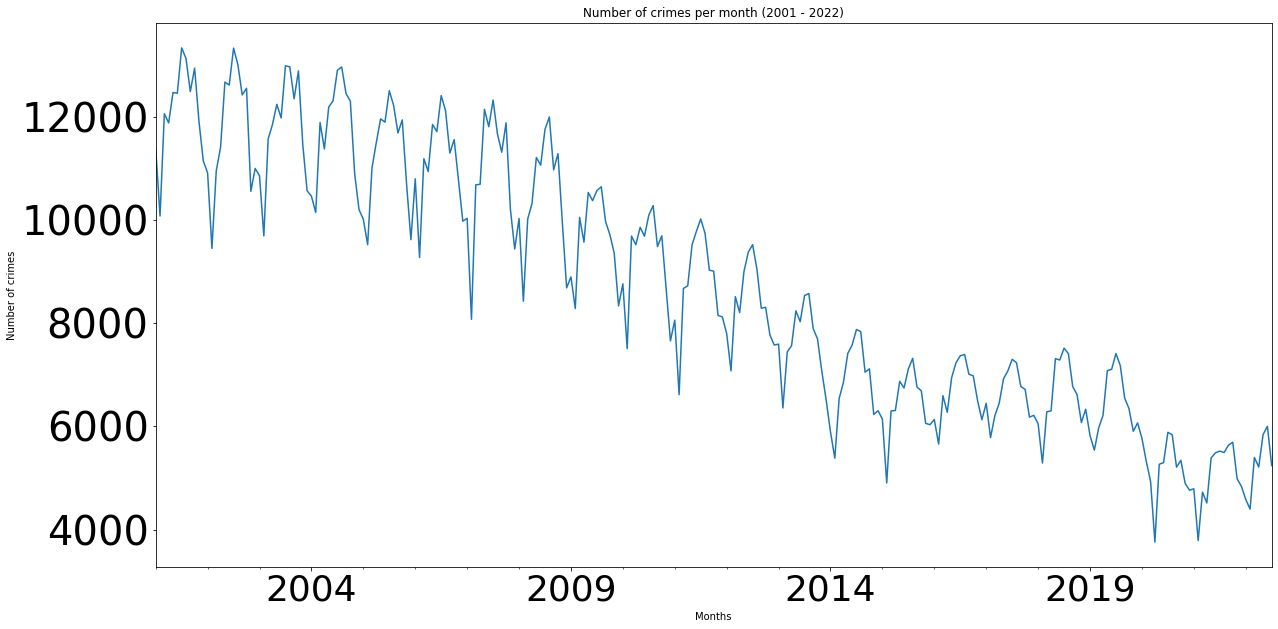

In [ ]:
plt.figure(figsize=(20,10))
df.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2001 - 2022)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

The above pattern shows there is sharp decrease in crime rate from 2009 till date.

Determining the pattern of crimes

This part of analysis can be further divided into various subdivisions. We decided to analyze the crime division on:

monthly basis

yearly basis

patterns of each crime over the years

Crimes occurring per month over the years

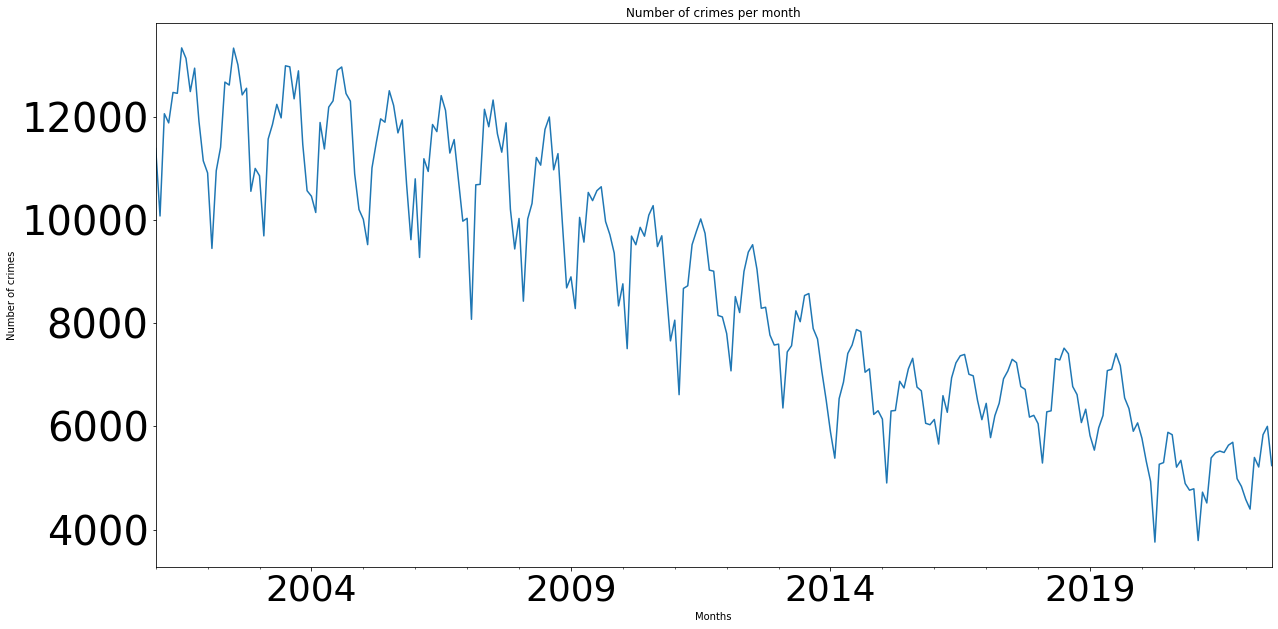

In [ ]:
plt.figure(figsize=(20,10))
df.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

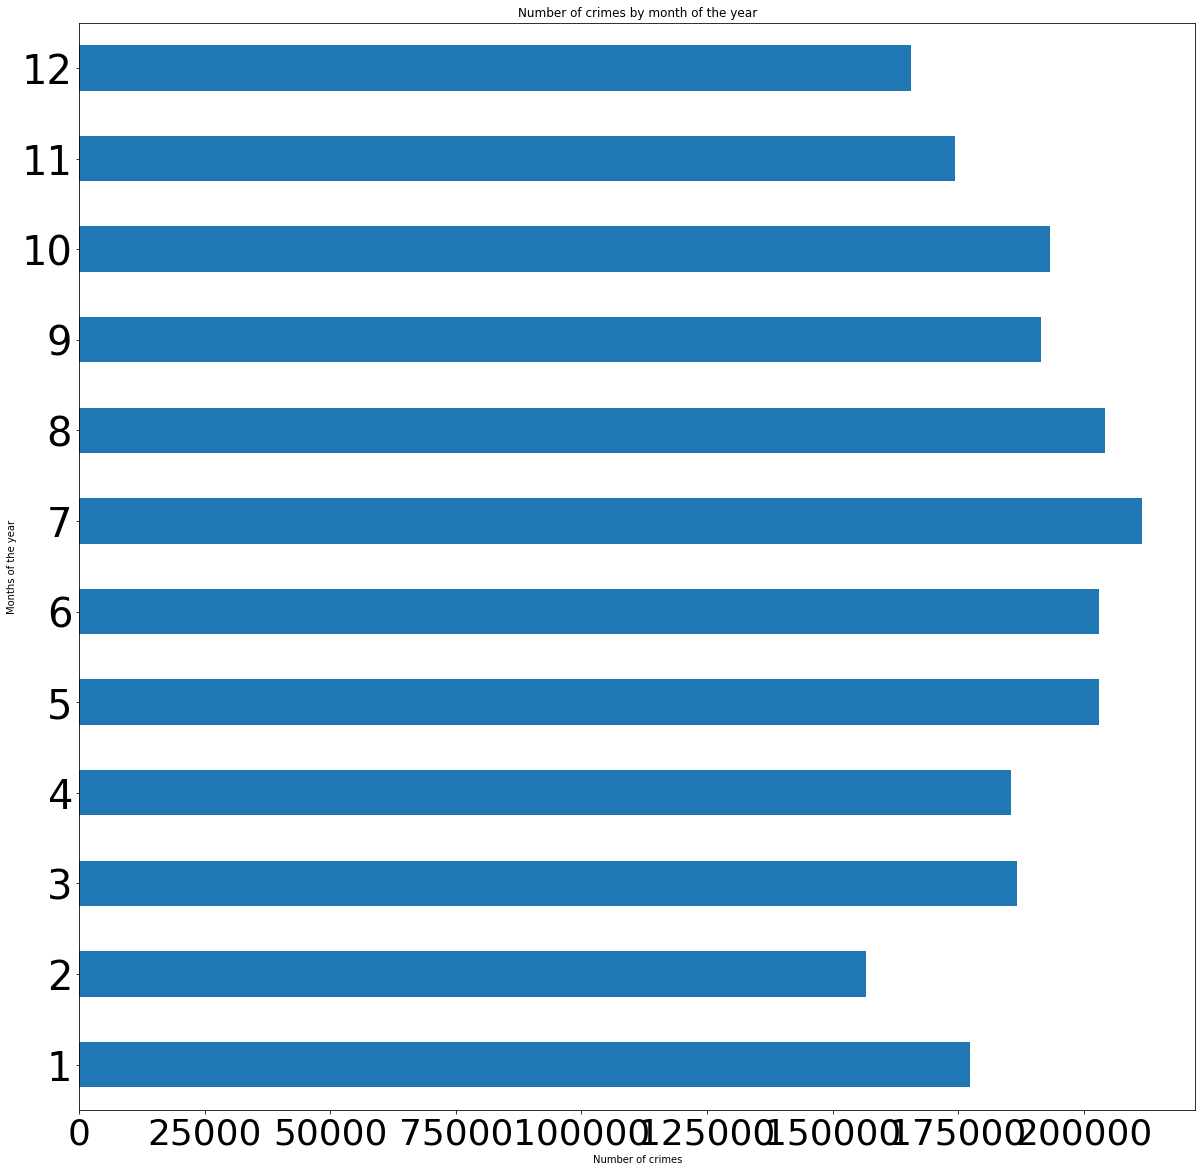

In [ ]:
plt.figure(figsize=(20,20))
df.groupby([df.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

Here we can also see the distribution of total number of crimes by months. “July” recorded the most number of crimes reported.

Repeating the same analysis for days of the week.

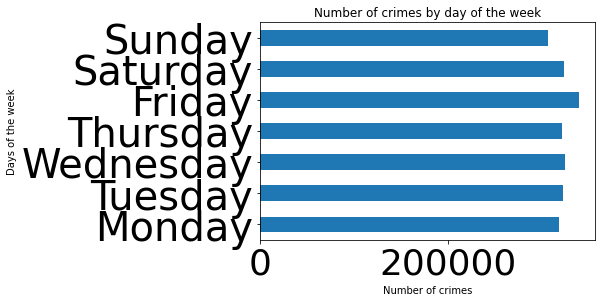

In [ ]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby([df.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

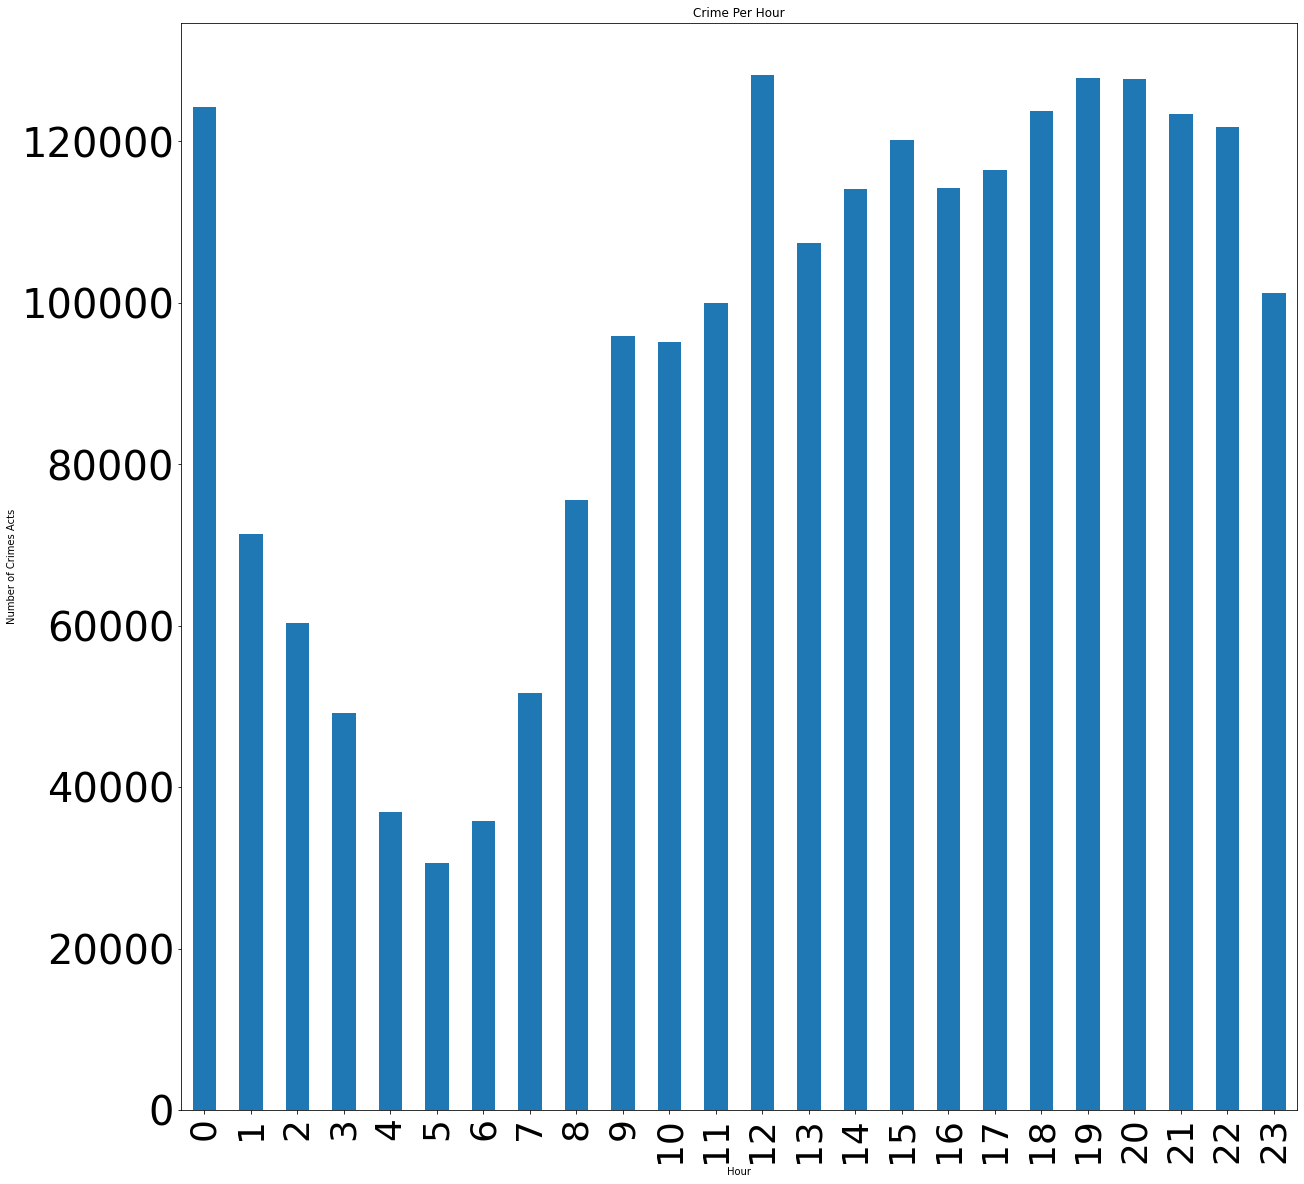

In [ ]:
plt.figure(figsize=(20,20))
df.groupby([df.index.hour]).size().plot.bar()
plt.title('Crime Per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes Acts')
plt.show()

 What are the most prevalent crimes in Chicago?

To predict the next crime type I needed to look into what the most common crimes were. First, I looked at an overall picture of how frequent every crime was. To do this, I created a seaborn factor plot showing the primary type against its count. I showed the top 20 to ease the analysis.

<AxesSubplot:xlabel='count', ylabel='Primary Type'>

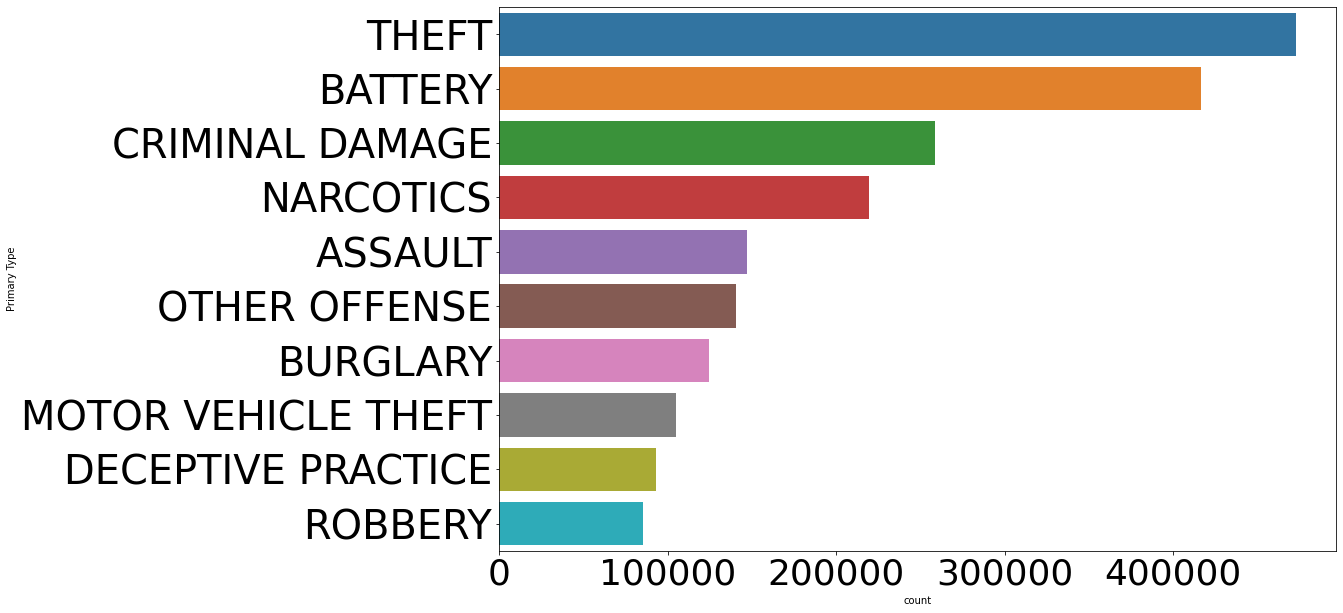

In [ ]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = df, order = df['Primary Type'].value_counts().iloc[:10].index)

This graph shows the type of crime plotted against its count. You can see the most common, by far, is theft, followed by battery, criminal damage, narcotics, assault, and beyond. It was interesting to see the magnitude to which theft and battery were by far the most common crimes.

Upon seeing the frequency of theft, I wanted to break things down further and see what type of theft was the most common. To do this, I created a new dataframe with only theft data in it through filtering for the primary type of theft.

In [ ]:
s = df[['Primary Type']]

In [ ]:
s.head()

,Primary Type
Date,
2008-07-26 14:30:00,CRIMINAL DAMAGE
2018-07-31 10:57:00,WEAPONS VIOLATION
2007-04-27 10:30:00,BURGLARY
2018-07-23 08:55:00,ASSAULT
2021-07-11 06:40:00,ASSAULT


C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


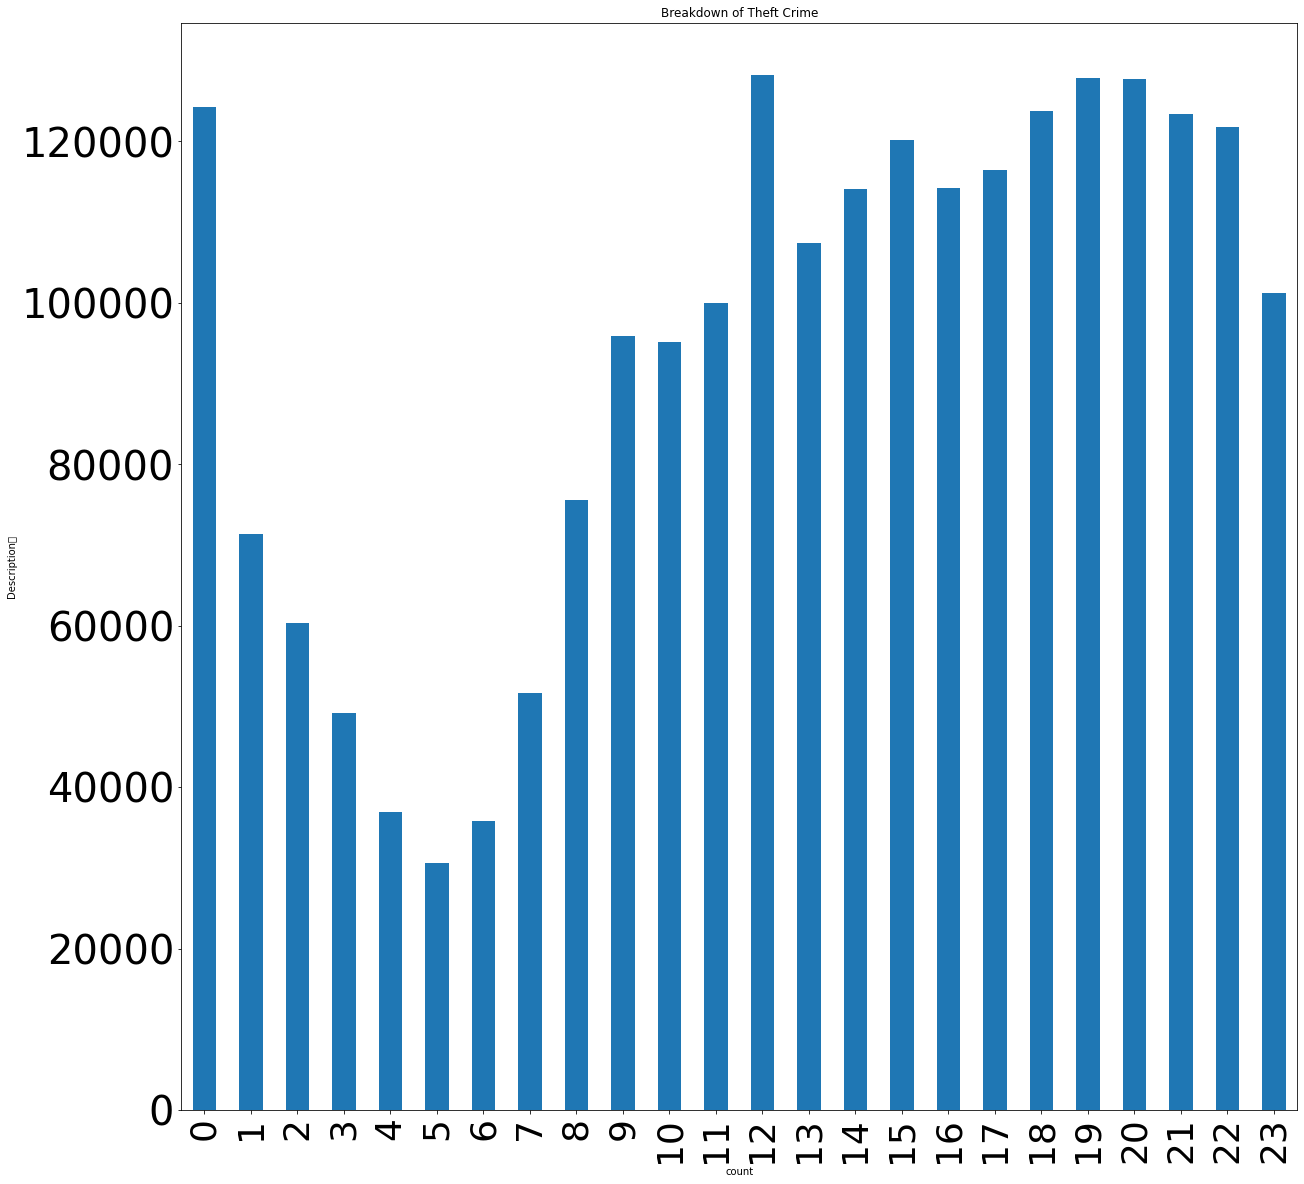

In [ ]:
plt.figure(figsize=(20,20))
df.groupby([df.index.hour]).size().plot.bar()
plt.title('Breakdown of Theft Crime')
plt.xlabel('count')
plt.ylabel('Description	')
plt.show()

In [ ]:
#extracting crimes which are theft and doing analysis on them
df_theft = df[df['Primary Type'] == 'THEFT']
df_theft.head()

,Unnamed: 0,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Location
Date,,,,,,,,,,,,,,,
2001-08-21 00:00:00,5,2001-08-21 00:00:00,003XX W 28 PL,THEFT,OVER $500,STREET,0,0,2113,2.0,NaN,NaN,06,2001,"(41.842450075, -87.635700695)"
2004-07-23 00:00:00,17,2004-07-23 00:00:00,009XX W GRACE ST,THEFT,$500 AND UNDER,OTHER,0,0,2324,19.0,44.0,6.0,06,2004,"(41.95113401, -87.653750509)"
2008-10-23 20:00:00,23,2008-10-23 20:00:00,003XX S MICHIGAN AVE,THEFT,$500 AND UNDER,PARK PROPERTY,0,0,123,1.0,2.0,32.0,06,2008,"(41.877959571, -87.624313409)"
2013-10-26 13:45:00,28,2013-10-26 13:45:00,008XX N MICHIGAN AVE,THEFT,POCKET-PICKING,GOVERNMENT BUILDING/PROPERTY,0,0,1833,18.0,42.0,8.0,06,2013,"(41.898767916, -87.624116333)"
2020-12-19 00:00:00,34,2020-12-19 00:00:00,005XX W DIVISION ST,THEFT,FROM BUILDING,APARTMENT,0,0,1823,18.0,27.0,8.0,06,2020,"(41.903726889, -87.64259764)"


<AxesSubplot:xlabel='count', ylabel='Description'>

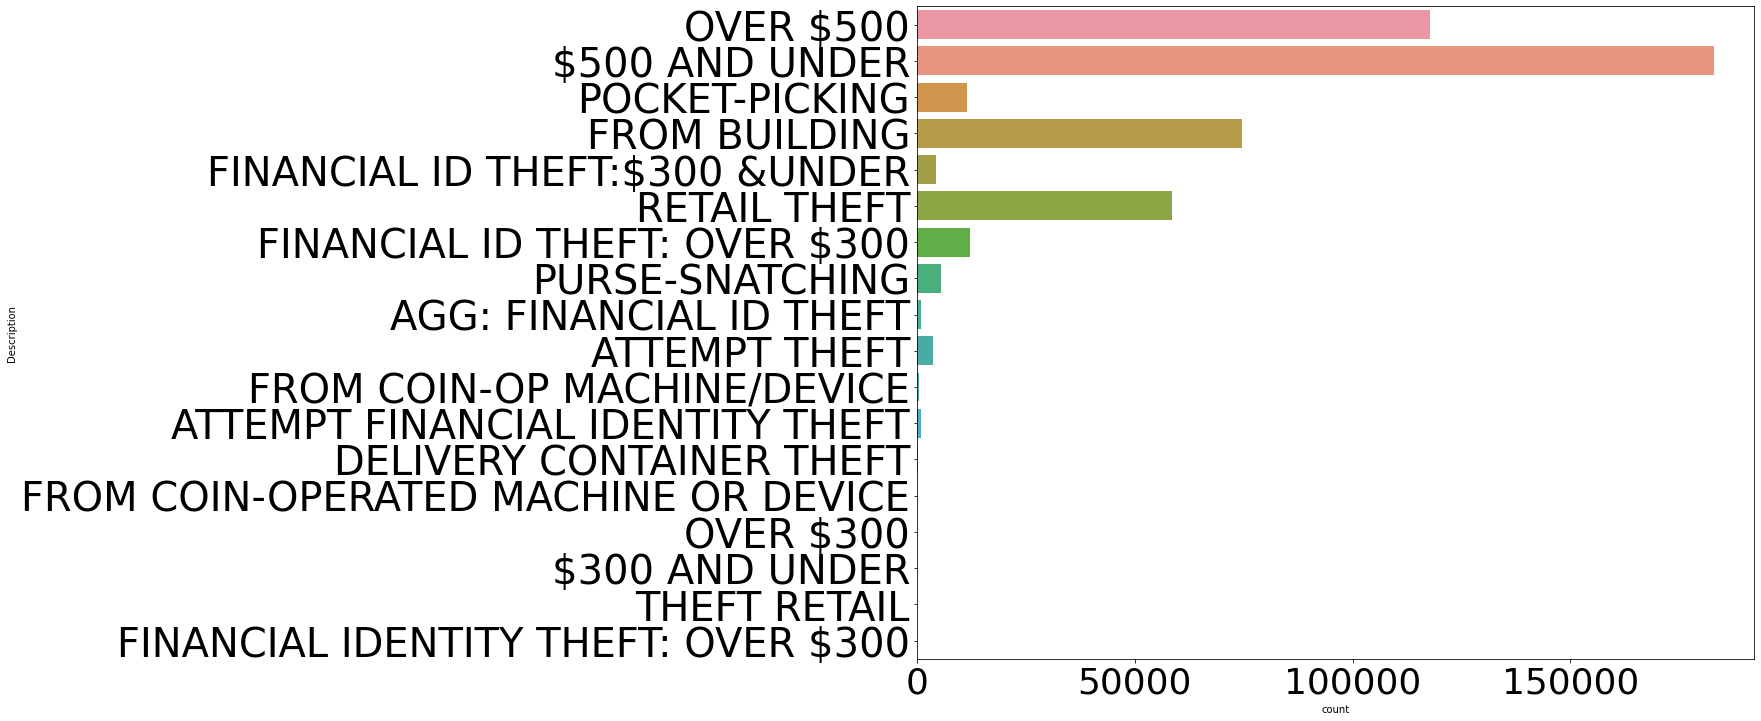

In [ ]:
#drawing the countplot for showing description of theft which had happened

plt.figure(figsize = (15, 12))
sns.countplot(y = df_theft['Description'])

This plot shows the dominance of $500 and under crimes within the theft category. This led me to see that “petty theft”, or small-scale theft, is the most common crime in Chicago from 2001–2021.

Now that I knew small theft (less than $500) was the most common type of crime, I wanted to see where this usually happened. To do this, I created a graph showing the location breakdown of small theft crimes.

In [ ]:
#creating a new dataframe which consists of description sorted on the basis of their number
new_df_theft = pd.DataFrame({'Counts' : df_theft['Description'].value_counts(), 'Description' : df_theft['Description'].value_counts().index})
new_df_theft.reset_index(inplace=True)
new_df_theft = new_df_theft.drop(columns = ['index'], axis = 1)
new_df_theft.head()

,Counts,Description
0,183061,$500 AND UNDER
1,117821,OVER $500
2,74599,FROM BUILDING
3,58595,RETAIL THEFT
4,12042,FINANCIAL ID THEFT: OVER $300


Where do small theft crimes happen? That is the location of small theft crime.

To look into this question, I would plot the top 10 locations of small theft crimes with a seaborn factorplot.

<AxesSubplot:xlabel='count', ylabel='Location Description'>

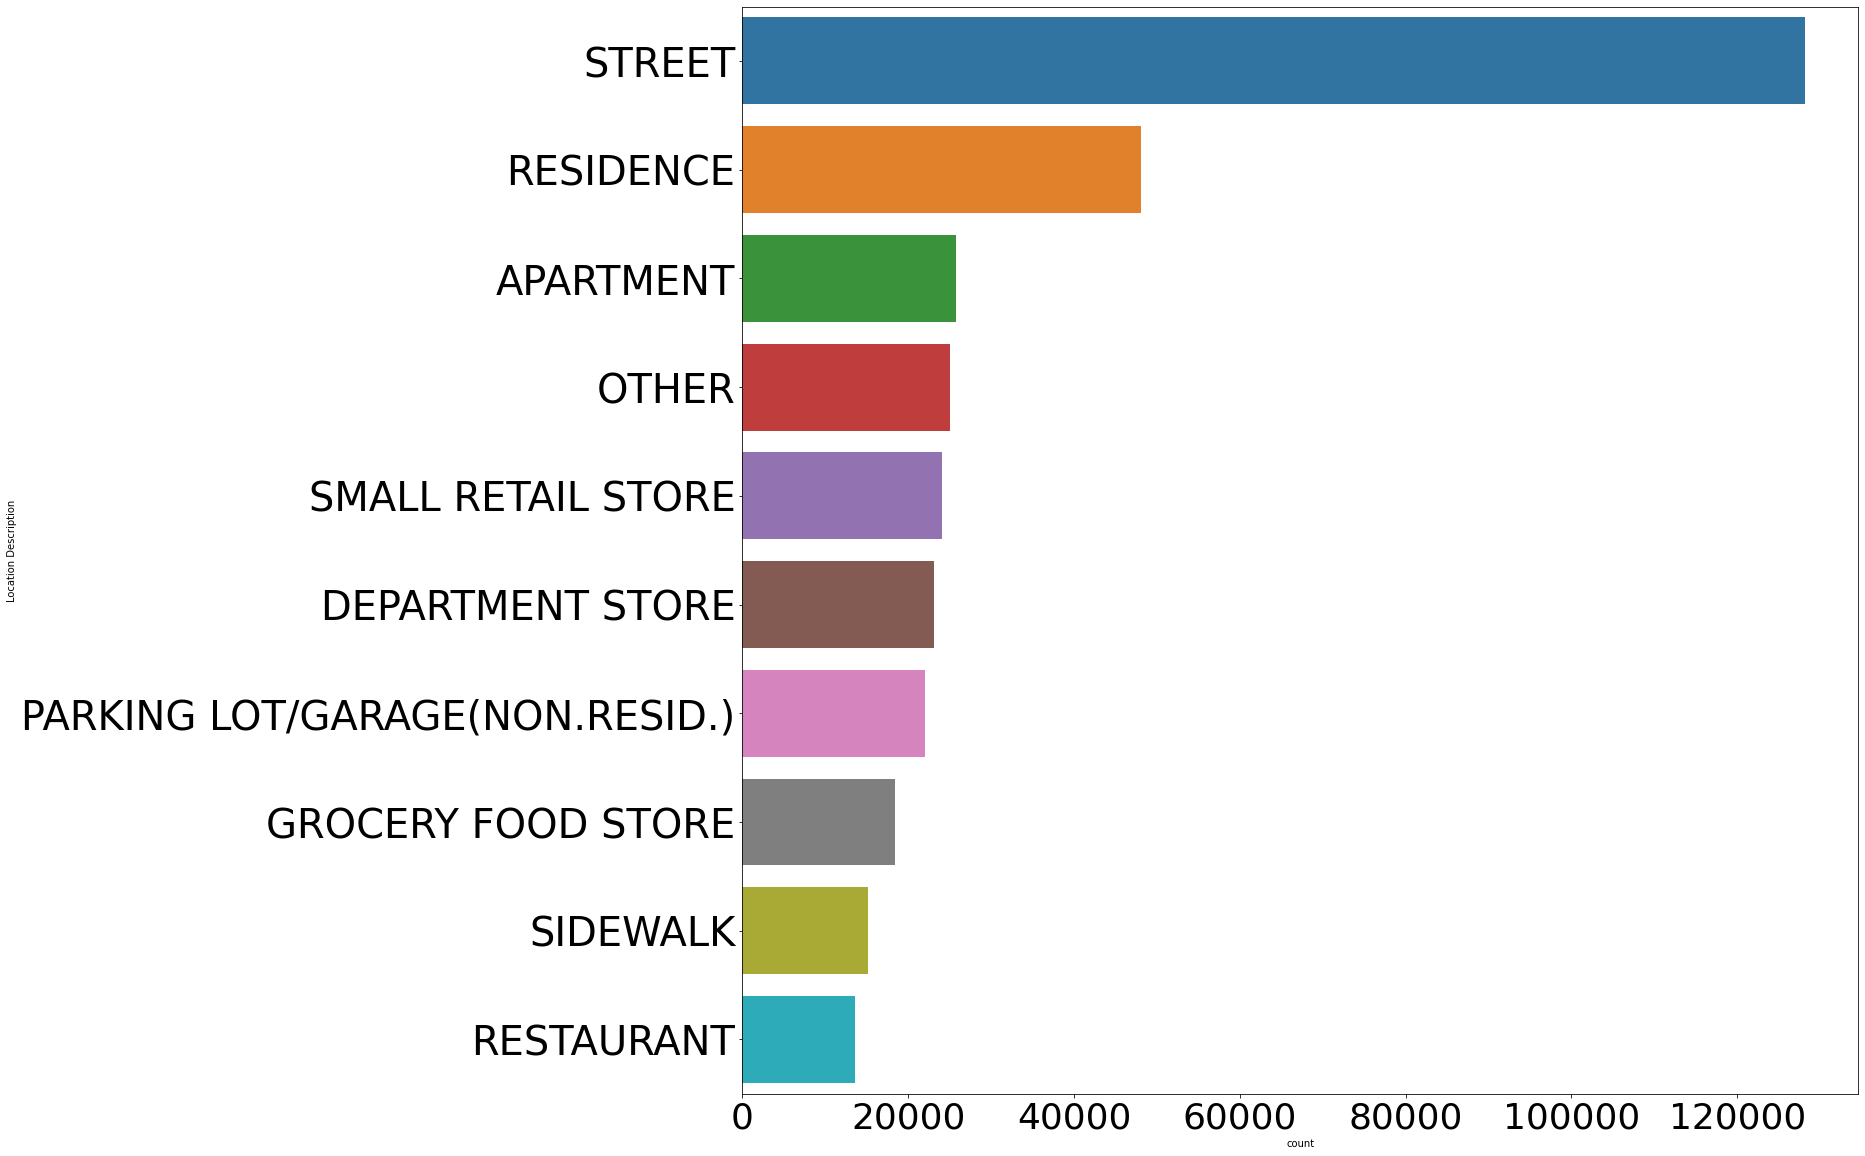

In [ ]:
#drawing the countplot for showing Location Description of theft which had happened
plt.figure(figsize = (20, 20))
sns.countplot(y = df_theft['Location Description'], data = df, order = df_theft['Location Description'].value_counts().iloc[:10].index)

The above graph shows that the most common place, by far, for small theft is the street. This leads me to infer theft is likely from stores and retail areas on the street, or potentially from individuals and persons on the street.

 Where do other crimes besides theft tend to occur?

 I was curious to see where other crimes besides theft tended to occur. I looked more closely at some of the more popular crimes, and also some more extreme crimes that I was curious to explore. To do this, I created several more dataframes for different types of crime. First, I created dataframes for the top 4 most popular crimes behind theft: battery, criminal damage, narcotics, and assault. Next, I created dataframes for other crimes I was interested to look into. These were sex offense, deception, burglary, arson, child-involved crimes, homicide, and kidnapping. By creating these dataframes, not only could I look at the locations of these crimes, but I could continue to use these dataframes throughout the rest of my analysis.

First, I looked into the four most popular types of crime and their locations behind theft: Battery Crimes, Criminal Damage, Narcotics, and Assault.

In [ ]:
#extracting crimes which are Battery and doing analysis on them
df_BATTERY = df[df['Primary Type'] == 'BATTERY']
df_BATTERY.head()

,Unnamed: 0,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Location
Date,,,,,,,,,,,,,,,
2008-10-26 17:00:00,11,2008-10-26 17:00:00,058XX S KEDZIE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,0,1,822,8.0,14.0,63.0,08B,2008,"(41.78707194, -87.703370418)"
2015-06-28 03:50:00,16,2015-06-28 03:50:00,047XX W FULTON ST,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,0,1,1113,11.0,28.0,25.0,08B,2015,"(41.88537469, -87.743742141)"
2002-01-02 17:00:00,19,2002-01-02 17:00:00,023XX S STATE ST,BATTERY,SIMPLE,CHA APARTMENT,0,1,2113,1.0,NaN,NaN,08B,2002,"(41.850517353, -87.627031661)"
2002-10-19 21:15:00,21,2002-10-19 21:15:00,133XX S BRANDON AVE,BATTERY,SIMPLE,STREET,0,0,433,4.0,10.0,55.0,08B,2002,"(41.653220991, -87.54591594)"
2020-04-26 13:55:00,32,2020-04-26 13:55:00,053XX W BLOOMINGDALE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,0,1,2532,25.0,37.0,25.0,08B,2020,"(41.91310479, -87.759909733)"


<AxesSubplot:xlabel='count', ylabel='Location Description'>

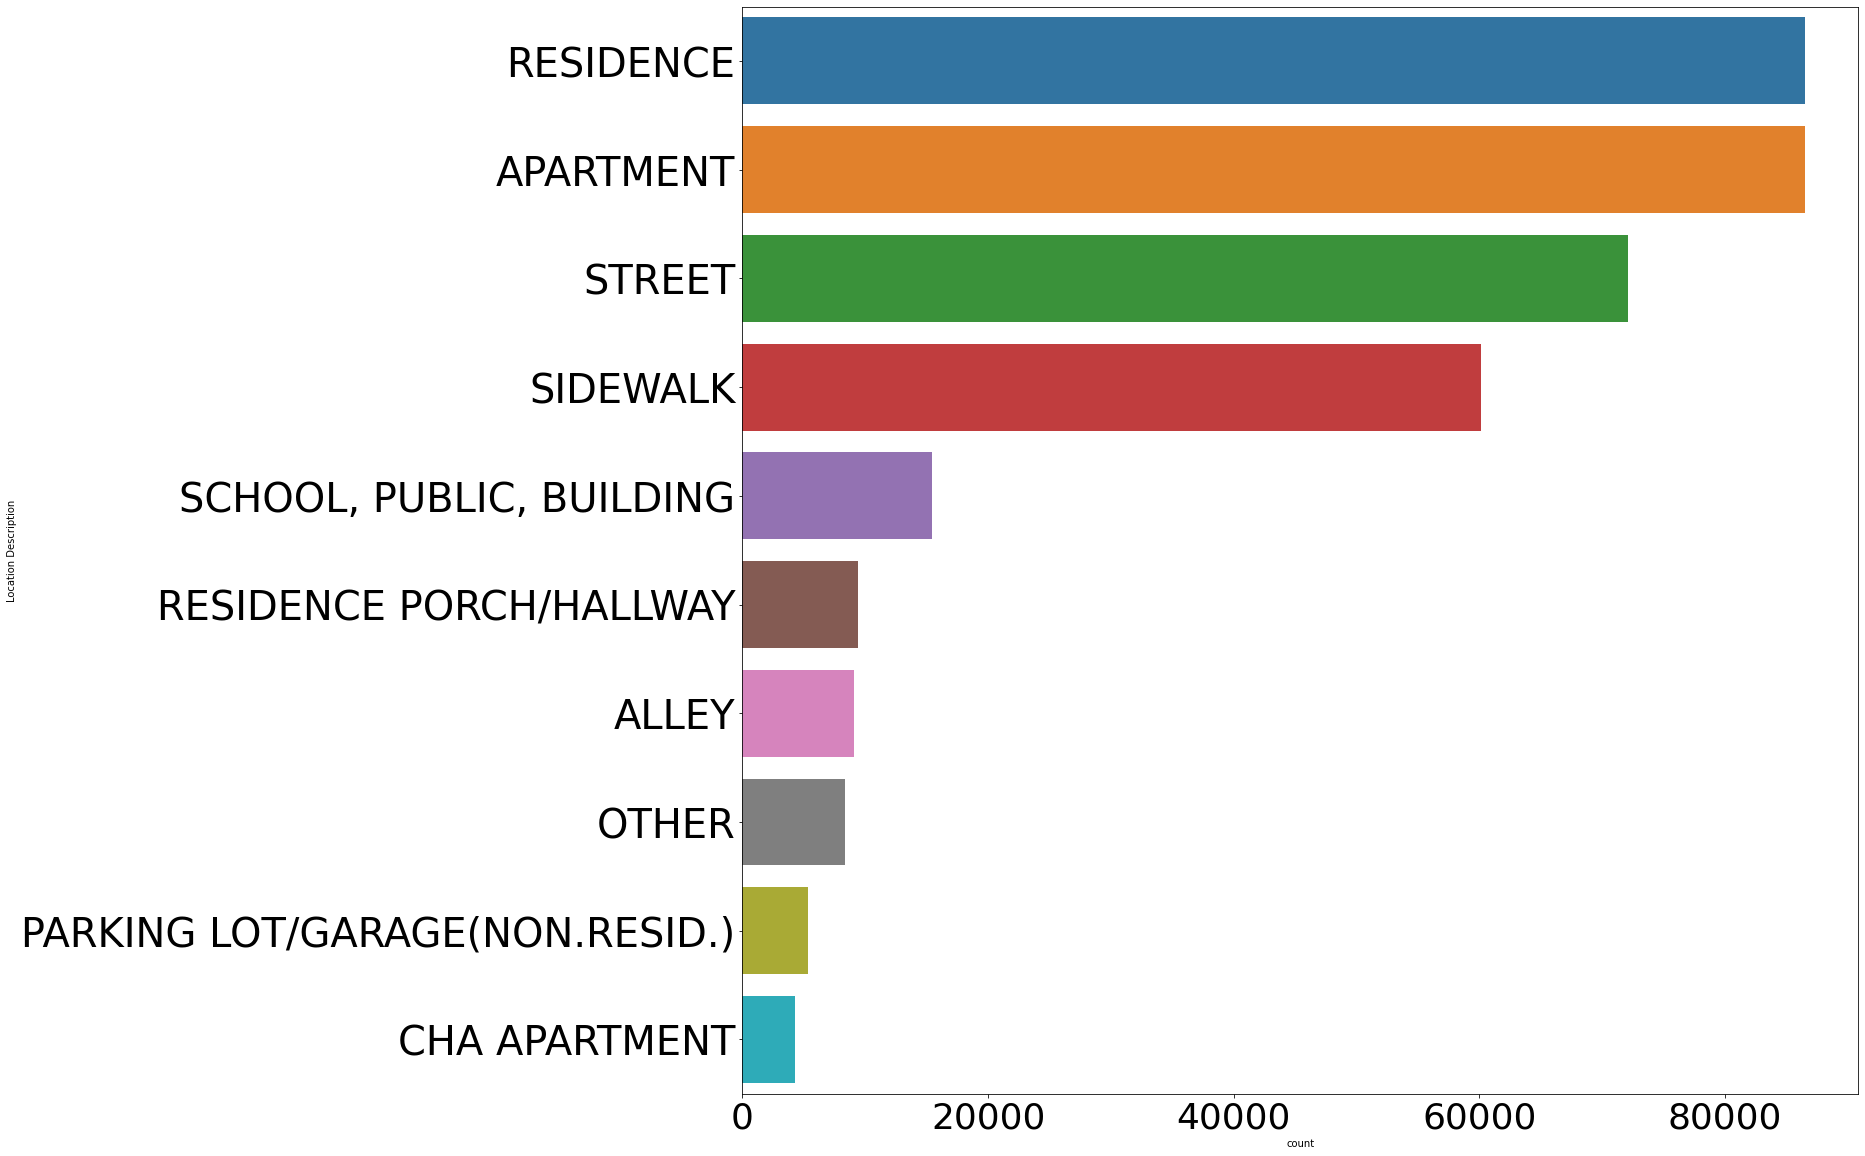

In [ ]:
#drawing the countplot for showing Location Description of BATTERY which had happened
plt.figure(figsize = (20, 20))
sns.countplot(y = df_BATTERY ['Location Description'], data = df, order = df_BATTERY ['Location Description'].value_counts().iloc[:10].index)

This graph shows the location of battery crimes. The most common location was an apartment, followed by residence, and then streets and sidewalk. This led me to infer most battery crimes were at the home, and then the streets. Other locations were insignificant.

In [ ]:
#extracting crimes which are Criminal Damage and doing analysis on them
df_CriminalDamage = df[df['Primary Type'] == 'CriminalDamage']
df_CriminalDamage.head()

,Unnamed: 0,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Location
Date,,,,,,,,,,,,,,,


In [ ]:
#extracting crimes which are NARCOTICS and doing analysis on them
df_NARCOTICS = df[df['Primary Type'] == 'NARCOTICS']
df_NARCOTICS.head()

,Unnamed: 0,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Location
Date,,,,,,,,,,,,,,,
2014-12-02 11:48:00,7,2014-12-02 11:48:00,043XX W POTOMAC AVE,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,1,0,2534,25.0,37.0,23.0,18,2014,"(41.904351902, -87.734347128)"
2016-06-18 23:15:00,9,2016-06-18 23:15:00,021XX N CALIFORNIA AVE,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,POLICE FACILITY/VEH PARKING LOT,1,0,1414,14.0,35.0,22.0,18,2016,"(41.921021491, -87.69730355)"
2014-01-18 09:00:00,10,2014-01-18 09:00:00,031XX W WARREN BLVD,NARCOTICS,MANU/DELIVER: HEROIN (WHITE),SIDEWALK,1,0,1222,12.0,28.0,27.0,18,2014,"(41.881907051, -87.704628385)"
2003-04-06 15:00:00,18,2003-04-06 15:00:00,002XX N LOREL AVE,NARCOTICS,POSS: CRACK,SIDEWALK,1,0,1523,15.0,28.0,25.0,18,2003,"(41.884902673, -87.758902361)"
2015-12-16 17:00:00,36,2015-12-16 17:00:00,031XX S HALSTED ST,NARCOTICS,POSS: CRACK,POLICE FACILITY/VEH PARKING LOT,1,0,913,9.0,11.0,60.0,18,2015,"(41.837489008, -87.646264459)"


<AxesSubplot:xlabel='count', ylabel='Location Description'>

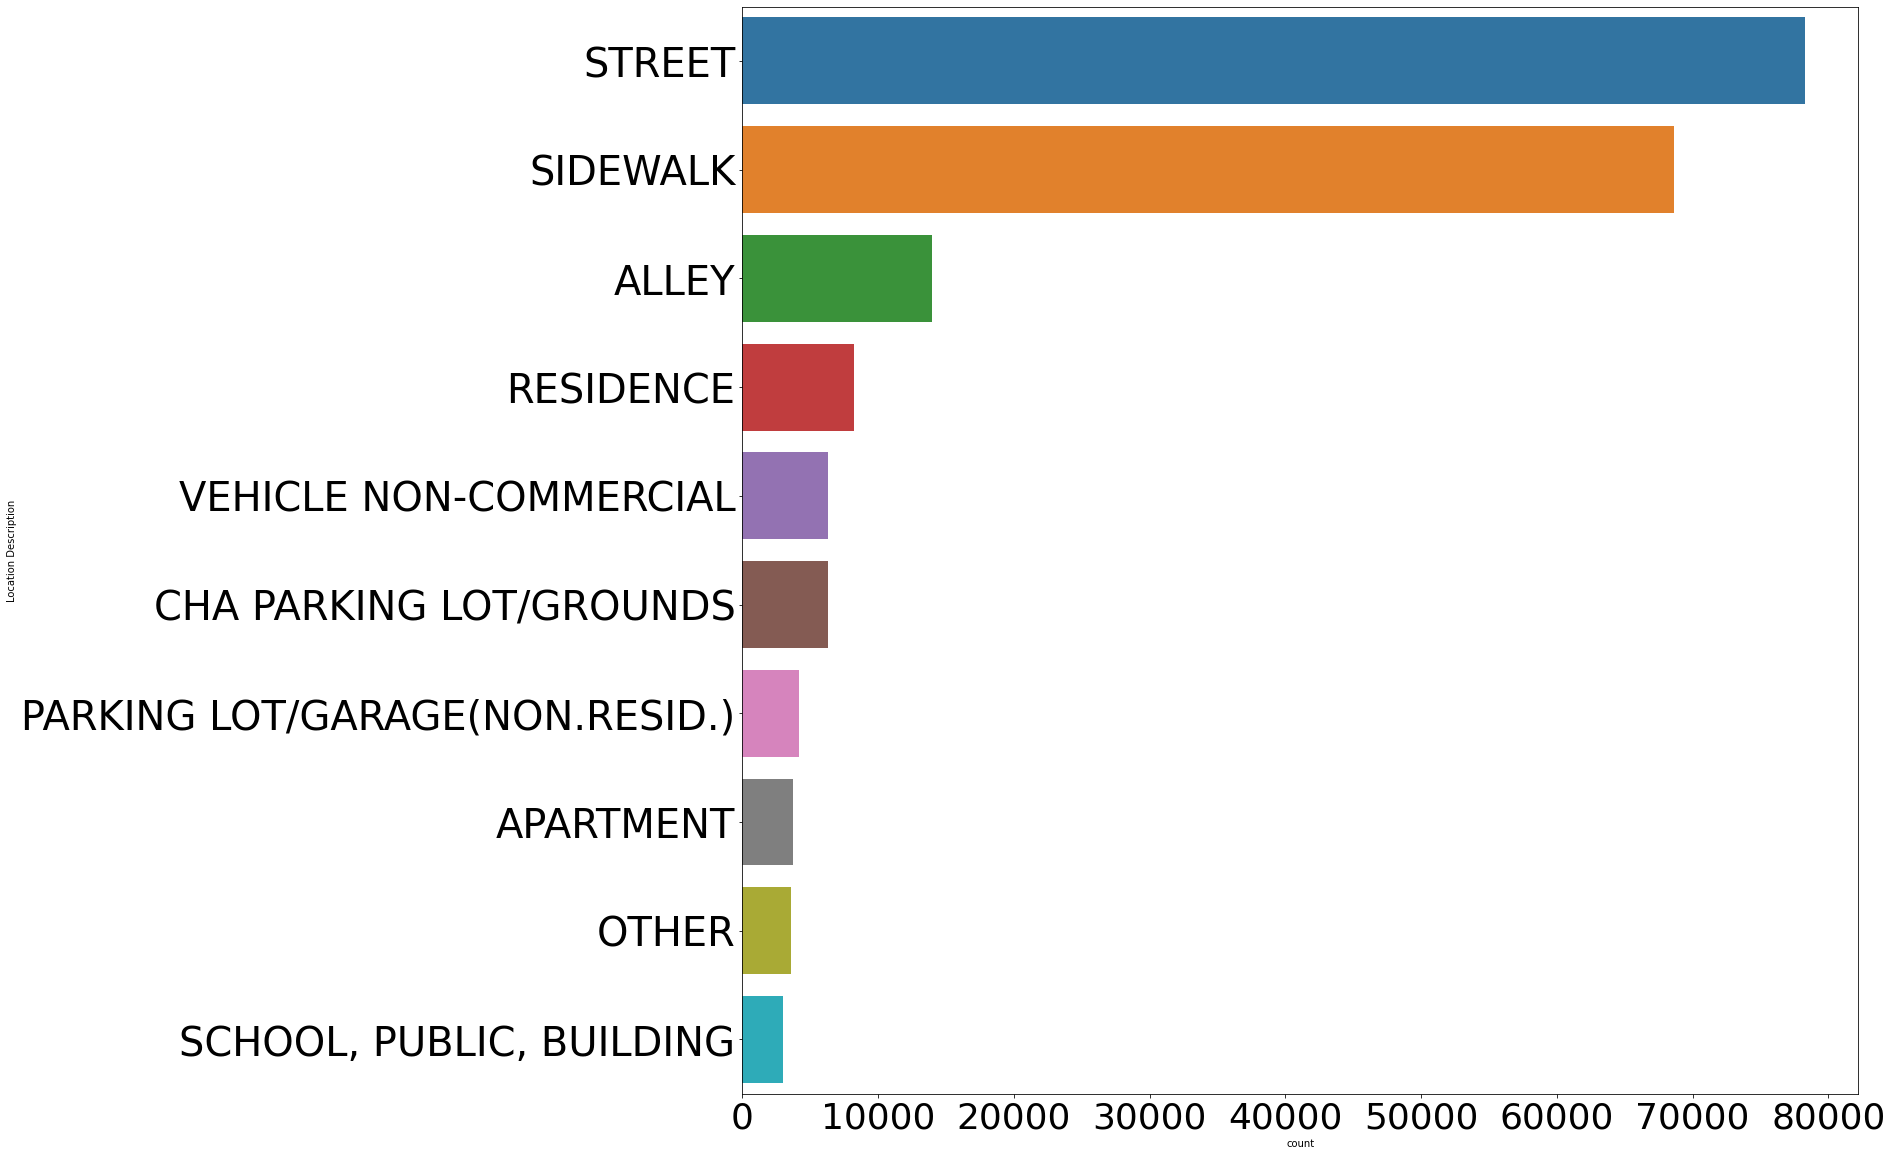

In [ ]:
#drawing the countplot for showing Location Description of NARCOTICS which had happened
plt.figure(figsize = (20, 20))
sns.countplot(y = df_NARCOTICS ['Location Description'], data = df, order = df_NARCOTICS ['Location Description'].value_counts().iloc[:10].index)

From the above graph i could infer that many of these narcotics charges are either dealing or using drugs, so it makes logical sense this would happen on the streets or sidewalks.

In [ ]:
#extracting crimes which are ASSAULT and doing analysis on them
df_ASSAULT = df[df['Primary Type'] == 'ASSAULT']
df_ASSAULT.head()

,Unnamed: 0,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Location
Date,,,,,,,,,,,,,,,
2018-07-23 08:55:00,3,2018-07-23 08:55:00,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,0,0,1115,11.0,28.0,26.0,08A,2018,"(41.881217483, -87.730589961)"
2021-07-11 06:40:00,4,2021-07-11 06:40:00,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),0,0,1231,12.0,27.0,28.0,04A,2021,"(41.874173691, -87.668082118)"
2017-11-08 13:10:00,26,2017-11-08 13:10:00,025XX W BERWYN AVE,ASSAULT,SIMPLE,STREET,0,0,2011,20.0,40.0,4.0,08A,2017,"(41.977685067, -87.693047613)"
2011-08-11 13:45:00,51,2011-08-11 13:45:00,093XX S LOWE AVE,ASSAULT,SIMPLE,RESIDENCE,0,0,2223,22.0,21.0,73.0,08A,2011,"(41.724631501, -87.63965452)"
2012-07-29 07:05:00,60,2012-07-29 07:05:00,066XX W BELDEN AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,0,0,2512,25.0,36.0,18.0,08A,2012,"(41.9211998, -87.792036506)"


<AxesSubplot:xlabel='count', ylabel='Location Description'>

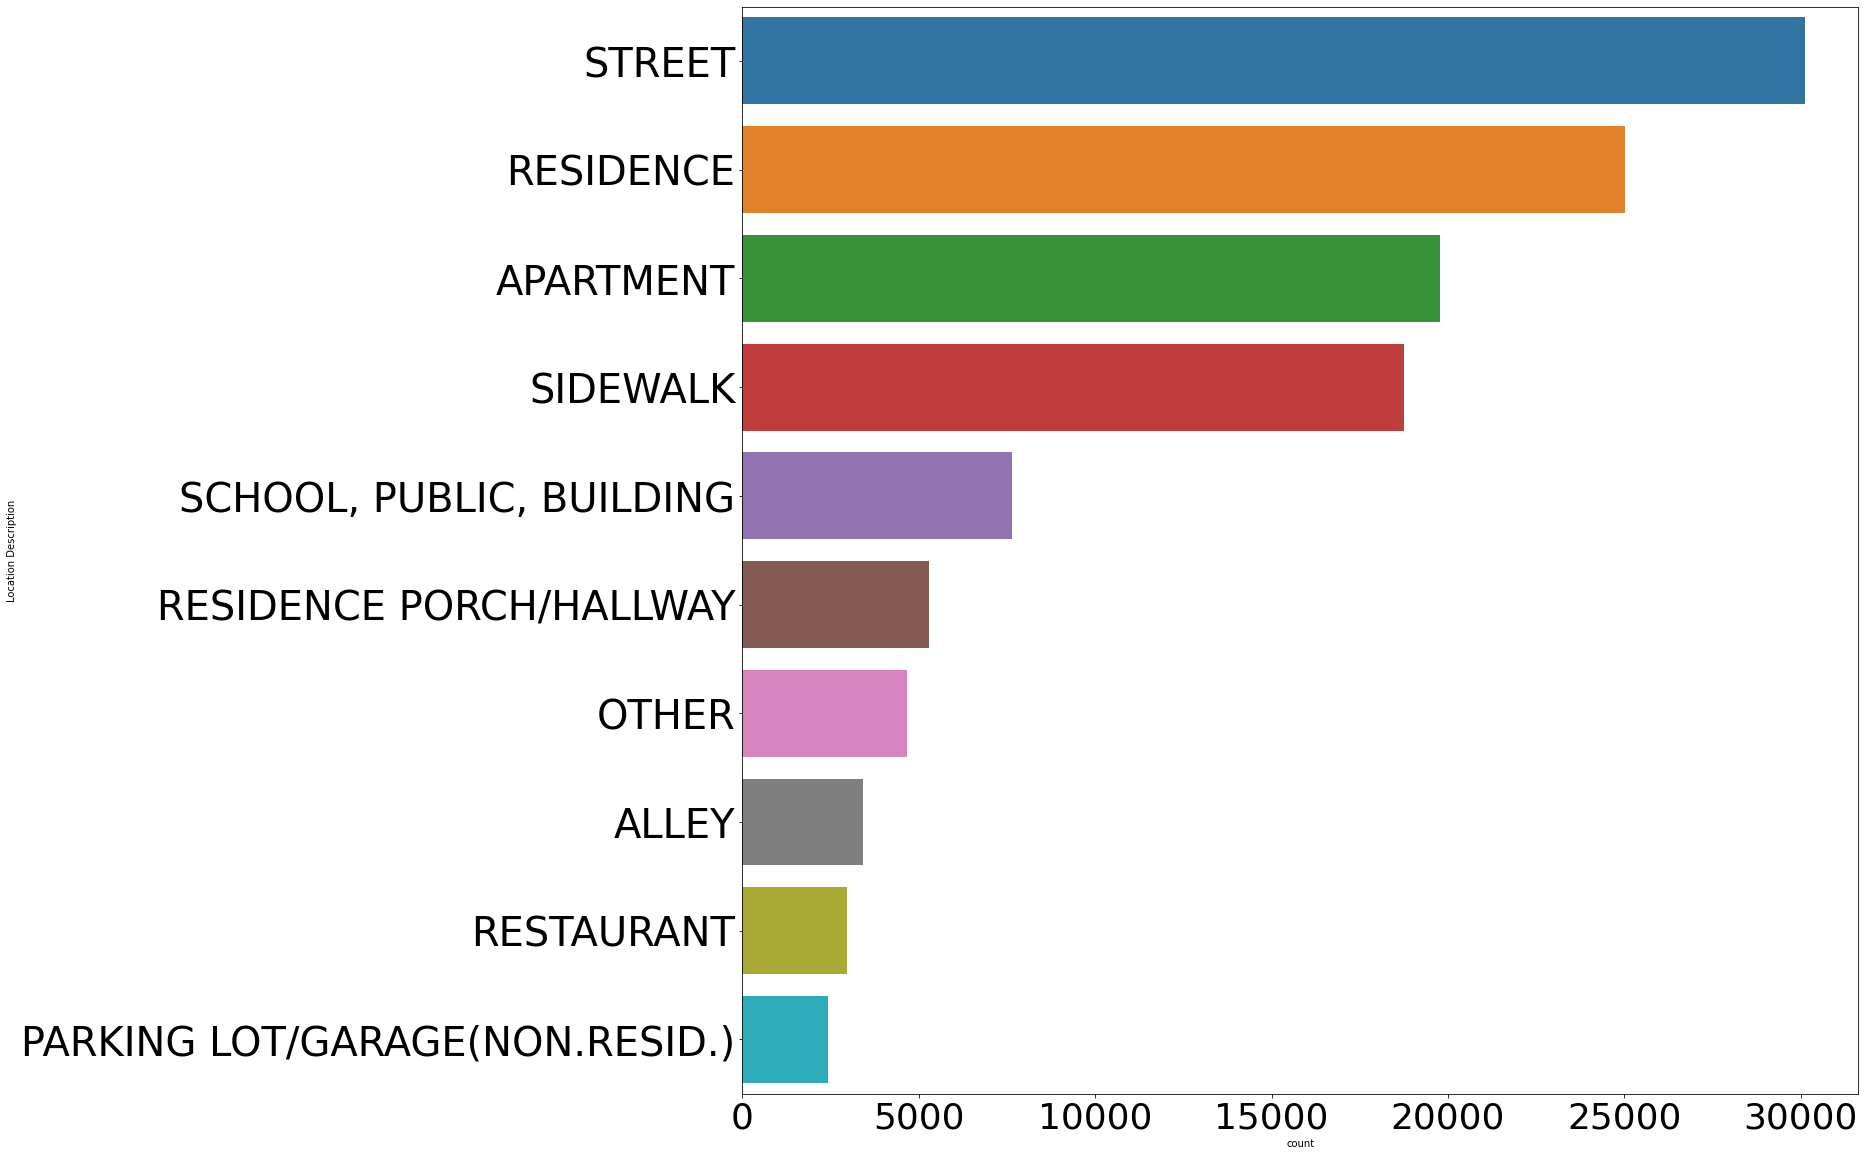

In [ ]:
#drawing the countplot for showing Location Description of ASSAULT which had happened
plt.figure(figsize = (20, 20))
sns.countplot(y = df_ASSAULT ['Location Description'], data = df, order = df_ASSAULT ['Location Description'].value_counts().iloc[:10].index)

This graph shows the most common location of assault crimes in Chicago. I thought it was interesting to see that the street areas (street & sidewalk) were nearly even with home areas (residence & apartment) in terms of this particular crime.

This analysis prompted me to infer that someone is likely to suffer from an assault on the streets as does in their homes. This called for further analysis on  how different types of assaults would differ between streets and homes.

In [ ]:
#creating a new dataframe which consists of description sorted on the basis of their number
new_df_ASSAULT = pd.DataFrame({'Counts' : df_ASSAULT['Description'].value_counts(), 'Description' : df_ASSAULT['Description'].value_counts().index})
new_df_ASSAULT.reset_index(inplace=True)
new_df_ASSAULT = new_df_ASSAULT.drop(columns = ['index'], axis = 1)
new_df_ASSAULT.head()

,Counts,Description
0,100636,SIMPLE
1,14754,AGGRAVATED: HANDGUN
2,9599,AGGRAVATED:KNIFE/CUTTING INSTR
3,7856,AGGRAVATED: OTHER DANG WEAPON
4,4531,PRO EMP HANDS NO/MIN INJURY


<AxesSubplot:xlabel='count', ylabel='Description'>

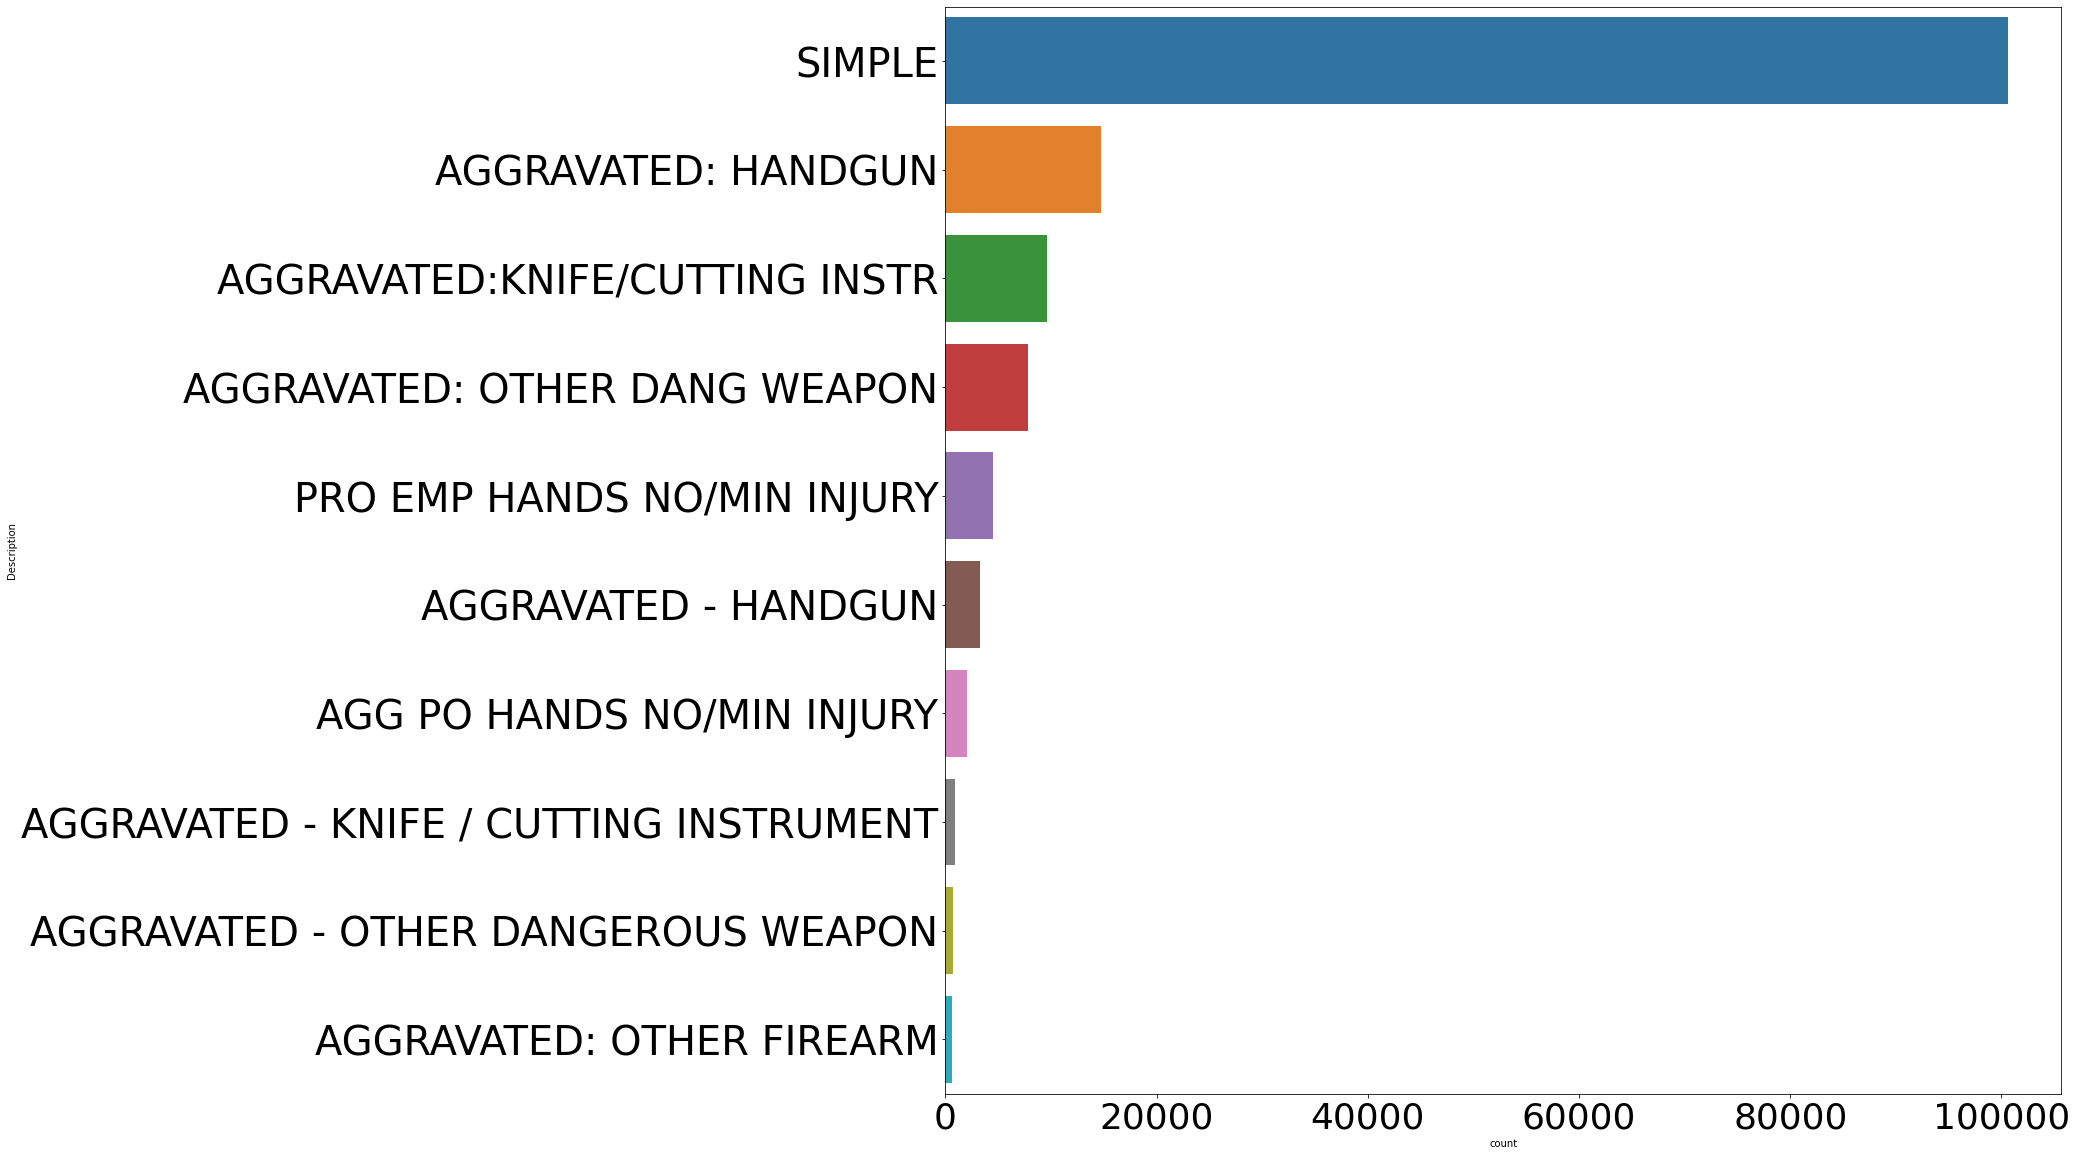

In [ ]:
#drawing the countplot for showing Description of ASSAULT which had happened
plt.figure(figsize = (20, 20))
sns.countplot(y = df_ASSAULT ['Description'], data = df, order = df_ASSAULT ['Description'].value_counts().iloc[:10].index)

This showed that the vast majority of assaults were “simple”, followed by handgun and then knife/cutting.

In [ ]:
#extracting crimes which are Simple ASSAULT and doing analysis on them
SimpleAssaultDf = df[df['Description'] == 'SIMPLE']
SimpleAssaultDf.head()

,Unnamed: 0,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Location
Date,,,,,,,,,,,,,,,
2018-07-23 08:55:00,3,2018-07-23 08:55:00,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,0,0,1115,11.0,28.0,26.0,08A,2018,"(41.881217483, -87.730589961)"
2002-01-02 17:00:00,19,2002-01-02 17:00:00,023XX S STATE ST,BATTERY,SIMPLE,CHA APARTMENT,0,1,2113,1.0,NaN,NaN,08B,2002,"(41.850517353, -87.627031661)"
2002-10-19 21:15:00,21,2002-10-19 21:15:00,133XX S BRANDON AVE,BATTERY,SIMPLE,STREET,0,0,433,4.0,10.0,55.0,08B,2002,"(41.653220991, -87.54591594)"
2017-11-08 13:10:00,26,2017-11-08 13:10:00,025XX W BERWYN AVE,ASSAULT,SIMPLE,STREET,0,0,2011,20.0,40.0,4.0,08A,2017,"(41.977685067, -87.693047613)"
2006-01-08 06:55:00,42,2006-01-08 06:55:00,077XX S PHILLIPS AVE,BATTERY,SIMPLE,SIDEWALK,0,0,421,4.0,7.0,43.0,08B,2006,"(41.754533775, -87.565074073)"


<AxesSubplot:xlabel='count', ylabel='Location Description'>

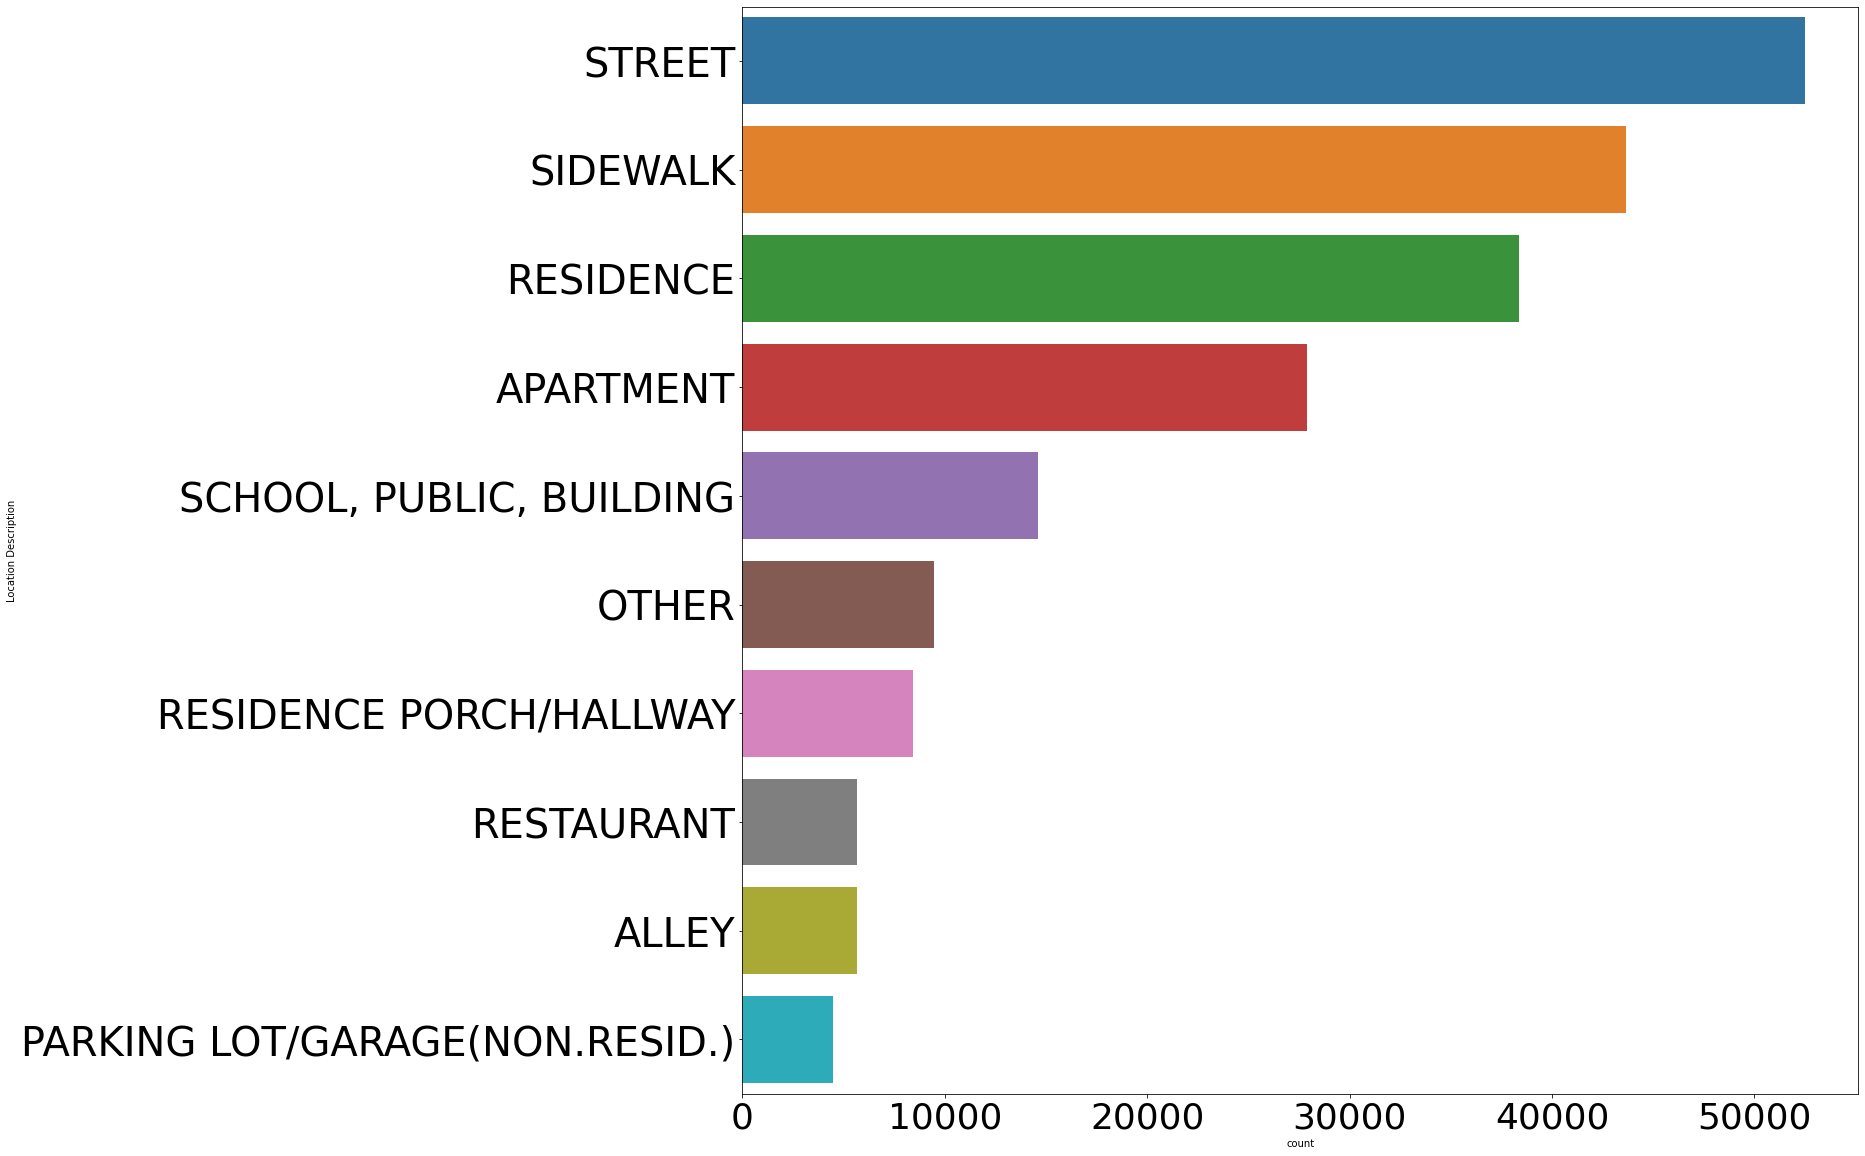

In [ ]:
#drawing the countplot for showing Location Description of Simple ASSAULT which had happened
plt.figure(figsize = (20, 20))
sns.countplot(y = SimpleAssaultDf ['Location Description'], data = df, order = SimpleAssaultDf ['Location Description'].value_counts().iloc[:10].index)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Date', 'Block', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'Year', 'Location'],
      dtype='object')

Where do most crimes take pace?

In [ ]:
types = df.groupby([df['Primary Type']]).size().sort_values(ascending=False)
types

Primary Type
THEFT                                473224
BATTERY                              416910
CRIMINAL DAMAGE                      258651
NARCOTICS                            219441
ASSAULT                              147048
OTHER OFFENSE                        140514
BURGLARY                             124678
MOTOR VEHICLE THEFT                  104919
DECEPTIVE PRACTICE                    92874
ROBBERY                               85272
CRIMINAL TRESPASS                     63200
WEAPONS VIOLATION                     30071
PROSTITUTION                          20565
PUBLIC PEACE VIOLATION                15433
OFFENSE INVOLVING CHILDREN            15266
SEX OFFENSE                            8259
CRIM SEXUAL ASSAULT                    7904
INTERFERENCE WITH PUBLIC OFFICER       5477
LIQUOR LAW VIOLATION                   4420
GAMBLING                               4308
ARSON                                  3865
HOMICIDE                               3597
KIDNAPPING         

Task: To Conduct a complete data analytics study and  uncover insights from the data that can be used to effectively prepare Police Department, PD for and respond to crimes. And this insights would help them determine What type of crimes to prepare for, Where these crimes are most likely to occur, What days of the week and periods to expect them.

In [ ]:
#Data Visualization Techniques is Required